<a href="https://colab.research.google.com/github/EliasSf73/test_/blob/master/DeepLearning%20Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 5 (Full mark: 100pt)

You can use ``Google Colab`` if you would like to use GPU.
- https://colab.research.google.com/notebooks/welcome.ipynb
- https://theorydb.github.io/dev/2019/08/23/dev-ml-colab/

# 1. Regression (50pt)

**For this question, using PyTorch, implement the 1) ridge regression and 2) Lasso. You can refer to the tutorial link below for how to implement linear regression. Note that the ridge regression is the linear regression with L2 penalty, and the Lasso is the linear regression with L1 penalty. You should use ````Boston```` dataset as shown in the code below. You should not only write the code for the models, but also train them and show the test MSE.**
- https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/linear_regression/main.py

<div>
<img src="figures/regressions.png" width="700"/>
</div>

In [1]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch import optim
# To fix the random seed
torch.manual_seed(0)
torch.cuda.manual_seed_all(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# load data
boston = pd.read_csv('/content/drive/MyDrive/stat ML/Lab_9/HW5/data/Boston.csv').drop('Unnamed: 0', axis=1)
data = torch.FloatTensor(boston.values)
X = data[:,:-1] # Input (X)
y = data[:,-1].reshape(-1, 1) # Ground Truth (y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Training without regularization

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit the scaler to the training data only
# X_train = scaler.fit_transform(X_train.numpy())  # Converting torch tensor to numpy array for scaling
# X_test = scaler.transform(X_test.numpy())

# Convert arrays back to tensors
X_train = torch.tensor(X_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float)
y_test = torch.tensor(y_test, dtype=torch.float)

model=nn.Linear(13,1)

criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.0003)
epochs=10
# for epoch in range(epochs):
#   model.train()
#   #forward
#   outputs=model(X_train)
#   loss=criterion(outputs,y_train)
#   #backward
#   optimizer.zero_grad()
#   loss.backward()
#   optimizer.step()
#   print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1,epochs,loss.item()))


<ipython-input-32-ee2d82278401>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float)
<ipython-input-32-ee2d82278401>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float)
<ipython-input-32-ee2d82278401>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float)
<ipython-input-32-ee2d82278401>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTen

# Training with Lasso and Ridge regularizations

Epoch [1/100], Training Loss: 620.4901
Test MSE: 545.8877
Epoch [11/100], Training Loss: 611.1068
Test MSE: 538.3922
Epoch [21/100], Training Loss: 601.9890
Test MSE: 531.1123
Epoch [31/100], Training Loss: 593.1232
Test MSE: 524.0356
Epoch [41/100], Training Loss: 584.4961
Test MSE: 517.1504
Epoch [51/100], Training Loss: 576.0969
Test MSE: 510.4457
Epoch [61/100], Training Loss: 567.9136
Test MSE: 503.9118
Epoch [71/100], Training Loss: 559.9349
Test MSE: 497.5394
Epoch [81/100], Training Loss: 552.1508
Test MSE: 491.3198
Epoch [91/100], Training Loss: 544.5531
Test MSE: 485.2455


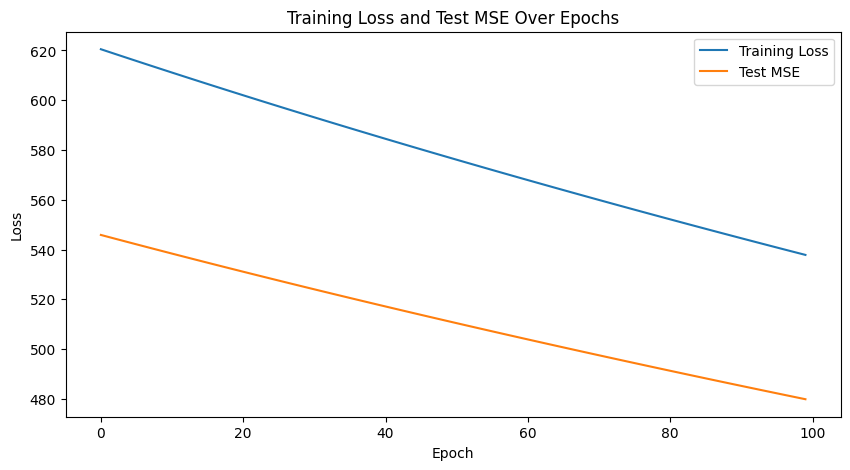

Epoch [1/100], Training Loss: 595.9422
Test MSE: 524.6331
Epoch [11/100], Training Loss: 587.1890
Test MSE: 517.6660
Epoch [21/100], Training Loss: 578.6702
Test MSE: 510.8861
Epoch [31/100], Training Loss: 570.3740
Test MSE: 504.2834
Epoch [41/100], Training Loss: 562.2894
Test MSE: 497.8478
Epoch [51/100], Training Loss: 554.4059
Test MSE: 491.5704
Epoch [61/100], Training Loss: 546.7141
Test MSE: 485.4427
Epoch [71/100], Training Loss: 539.2047
Test MSE: 479.4569
Epoch [81/100], Training Loss: 531.8695
Test MSE: 473.6057
Epoch [91/100], Training Loss: 524.7005
Test MSE: 467.8824


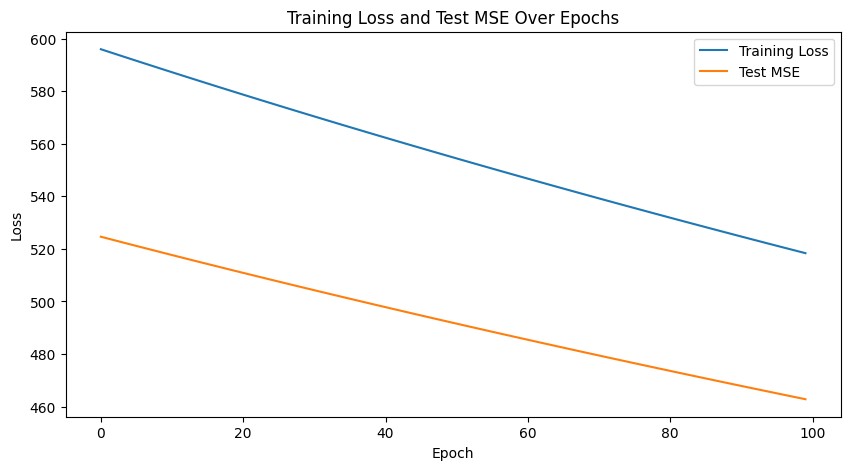

In [34]:
from pickle import NONE
num_epochs = 100
learning_rate = 0.0003

class Ridge(nn.Module):
    def __init__(self, input_dim, alpha=None):
        super().__init__()
        ## Write your answer here
        # regularization parameter
        self.alpha=alpha
        #linear model
        self.linear=nn.Linear(input_dim,1)

    def forward(self, X):
        ## Write your answer here
        return self.linear(X)
    def regularization_loss(self):
      ridge=self.alpha*torch.norm(self.linear.weight,p=2)**2
      return ridge

class Lasso(nn.Module):
    def __init__(self, input_dim,alpha=None):
        super().__init__()
        ## Write your answer here
        #linear model
        self.linear=nn.Linear(input_dim,1)
        #regularization parameter
        self.alpha=alpha

    def forward(self, X):
      return self.linear(X)

    def regularization_loss(self):
      lasso=self.alpha*torch.norm(self.linear.weight,p=1)
      return lasso
        ## Write your answer here



## Write your answer here (Training code)
def train_model(model, X_train, y_train, X_test, y_test, num_epochs=100, learning_rate=0.003):
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), learning_rate)

    # Lists to store loss and accuracy for plotting
    training_losses = []
    test_mses = []

    for epoch in range(num_epochs):
        # Set model to training mode
        model.train()

        # Reset all gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(X_train)

        # Compute and accumulate loss
        loss = criterion(outputs, y_train) + model.regularization_loss()

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Save the current training loss
        training_losses.append(loss.item())

        # Print training loss
        if epoch % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}')

        # Evaluate the model on the test set
        model.eval()
        with torch.no_grad():
            predictions = model(X_test)
            mse = criterion(predictions, y_test)
            test_mses.append(mse.item())

        # Print test MSE
        if epoch % 10 == 0:
            print(f'Test MSE: {mse.item():.4f}')

    # Plot the training and test losses
    plt.figure(figsize=(10, 5))
    plt.plot(training_losses, label='Training Loss')
    plt.plot(test_mses, label='Test MSE')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss and Test MSE Over Epochs')
    plt.legend()
    plt.show()


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train Ridge and Lasso and show the final test MSE.
input_dim=X_train.shape[1]
#instantiate lasso model
lasso_model=Lasso(input_dim,alpha=0.01)
#instantiate ridge model
ridge_model=Ridge(input_dim,alpha=0.01)
#train with lasso model
train_model(lasso_model,torch.tensor(X_train, dtype=torch.float),y_train,torch.tensor(X_test, dtype=torch.float),y_test,num_epochs,learning_rate)
#train with ridge model
train_model(ridge_model,torch.tensor(X_train, dtype=torch.float),y_train,torch.tensor(X_test, dtype=torch.float),y_test,num_epochs,learning_rate)



# 2. Autoencoder (50pt)
**Autoencoder is an unsupervised neural network model for learning representations of the input. In the figure below, you can see the structure of an autoencoder network. Given the original input image, we first encode the image using ``Encoder`` to a compressed representation, and reconstruct the image by using ``Decoder`` given the compressed representation. The compressed represesntation can be used as the dimension reduced representation of the original input. In this regard, autoencoder is also known as a model for dimensionality reduction (Recall PCA was also a method for dimensionality reduction). Note that the encoder and the decoder can be any neural network model such as MLP, CNN, MLP, etc.**

**For this question, you will use MNIST dataset to implement two versions of autoencoders: 1) An MLP-based autoencoder, and 2) A CNN-based autoencoder. The figure below shows an example of the MLP-based autoencoder. For the MLP-based autoencoder, you should follow the structure of the autoencoder shown in the figure below. For the CNN-based autoencoder, you are free to choose the architecture. You only need to implement ``Autoencoder_MLP`` class and ``Autoencoder_CNN`` class. Note that for ``Autoencoder_MLP``, you should flatten the original image into a vector, whereas for ``Autoencoder_CNN``, you can use the original image without any modification. After implementing these two classes, save the figures and observe the results. Write a few sentences to describe your findings. You do not need to submit the saved figure and the dataset for your final submission.**

<div>
<img src="figures/autoencoder.png" width="700"/>
</div>

In [15]:
import os

import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import save_image

# Make a directory "saved_img" if it does not exist
if not os.path.exists('./saved_img'):
    os.mkdir('./saved_img')


def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 1, 28, 28)
    return x


num_epochs = 100
batch_size = 128
learning_rate = 1e-3

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

dataset = MNIST('/content/drive/MyDrive/stat ML/Lab_9/HW5/data/MNIST', transform=img_transform,download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


class Autoencoder_MLP(nn.Module):
    def __init__(self):
        super(Autoencoder_MLP, self).__init__()
        # Encoder definition
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),  # Input layer to first hidden layer
            nn.ReLU(True),          # ReLU activation
            nn.Linear(128, 64),     # Second hidden layer
            nn.ReLU(True),          # ReLU activation
            nn.Linear(64, 12),      # Third hidden layer
            nn.ReLU(True),          # ReLU activation
            nn.Linear(12, 3)        # Compressed representation
        )
        # Decoder definition
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),       # Compressed representation to first hidden layer
            nn.ReLU(True),          # ReLU activation
            nn.Linear(12, 64),      # Second hidden layer
            nn.ReLU(True),          # ReLU activation
            nn.Linear(64, 128),     # Third hidden layer
            nn.ReLU(True),          # ReLU activation
            nn.Linear(128, 28*28),  # Last layer to output
            nn.Tanh()               # Tanh activation to bring the output values between -1 and 1
        )

    def forward(self, x):
        x = self.encoder(x)        # Pass the input through the encoder
        x = self.decoder(x)        # Pass the encoded form through the decoder
        return x


class Autoencoder_CNN(nn.Module):
    def __init__(self):
        super(Autoencoder_CNN, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),  # Output: [16, 14, 14]
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1), # Output: [32, 7, 7]
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=7)  # Output: [64, 1, 1]
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=7),  # Output: [32, 7, 7]
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),  # Output: [16, 14, 14]
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),  # Output: [1, 28, 28]
            nn.Sigmoid()  #  sigmoid to scale the output between 0 and 1
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x



# Uncomment below correspondingly

model_mlp = Autoencoder_MLP().cuda()
model_conv = Autoencoder_CNN().cuda()


# with MLP_Autoencoder

In [16]:

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_mlp.parameters(), lr=learning_rate, weight_decay=1e-5)

for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data

        # Flatten the image for Autoencoder_MLP (You can remove this line for Autoencoder_CNN)
        img = img.view(img.size(0), -1)
        img = img.to(device)

        # forward pass
        output = model_mlp(img)
        output = output.to(device)
        loss = criterion(output, img)
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print log and save images
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch + 1, num_epochs, loss.item()))
    if epoch % 10 == 0:
        pic = to_img(output.cpu().data)
        save_image(pic, './saved_img/image_{}.png'.format(epoch))

epoch [1/100], loss:0.2078
epoch [2/100], loss:0.1738
epoch [3/100], loss:0.1703
epoch [4/100], loss:0.1562
epoch [5/100], loss:0.1525
epoch [6/100], loss:0.1531
epoch [7/100], loss:0.1387
epoch [8/100], loss:0.1435
epoch [9/100], loss:0.1345
epoch [10/100], loss:0.1362
epoch [11/100], loss:0.1361
epoch [12/100], loss:0.1426
epoch [13/100], loss:0.1339
epoch [14/100], loss:0.1406
epoch [15/100], loss:0.1315
epoch [16/100], loss:0.1271
epoch [17/100], loss:0.1304
epoch [18/100], loss:0.1311
epoch [19/100], loss:0.1419
epoch [20/100], loss:0.1343
epoch [21/100], loss:0.1256
epoch [22/100], loss:0.1409
epoch [23/100], loss:0.1273
epoch [24/100], loss:0.1366
epoch [25/100], loss:0.1394
epoch [26/100], loss:0.1445
epoch [27/100], loss:0.1248
epoch [28/100], loss:0.1262
epoch [29/100], loss:0.1389
epoch [30/100], loss:0.1345
epoch [31/100], loss:0.1362
epoch [32/100], loss:0.1307
epoch [33/100], loss:0.1292
epoch [34/100], loss:0.1211
epoch [35/100], loss:0.1281
epoch [36/100], loss:0.1317
e

# CNN_Autoencoder

In [17]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_conv.parameters(), lr=learning_rate, weight_decay=1e-5)

for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data

        # Flatten the image for Autoencoder_MLP (You can remove this line for Autoencoder_CNN)
        img = img.view(img.size(0), -1)
        img = img.to(device)

        # forward pass
        output = model_mlp(img)
        output = output.to(device)
        loss = criterion(output, img)
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print log and save images
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch + 1, num_epochs, loss.item()))
    if epoch % 10 == 0:
        pic = to_img(output.cpu().data)
        save_image(pic, './saved_img/image_{}.png'.format(epoch))

epoch [1/100], loss:0.1179
epoch [2/100], loss:0.1179
epoch [3/100], loss:0.1232
epoch [4/100], loss:0.1164
epoch [5/100], loss:0.1240
epoch [6/100], loss:0.1321
epoch [7/100], loss:0.1157
epoch [8/100], loss:0.1123
epoch [9/100], loss:0.1280
epoch [10/100], loss:0.1138
epoch [11/100], loss:0.1291
epoch [12/100], loss:0.1263
epoch [13/100], loss:0.1151
epoch [14/100], loss:0.1194
epoch [15/100], loss:0.1258
epoch [16/100], loss:0.1165
epoch [17/100], loss:0.1127
epoch [18/100], loss:0.1217
epoch [19/100], loss:0.1187
epoch [20/100], loss:0.1033
epoch [21/100], loss:0.1187
epoch [22/100], loss:0.1049
epoch [23/100], loss:0.1207
epoch [24/100], loss:0.1227
epoch [25/100], loss:0.1277
epoch [26/100], loss:0.1182
epoch [27/100], loss:0.1150
epoch [28/100], loss:0.1243
epoch [29/100], loss:0.1228
epoch [30/100], loss:0.1269
epoch [31/100], loss:0.1275
epoch [32/100], loss:0.1241
epoch [33/100], loss:0.1205
epoch [34/100], loss:0.1229
epoch [35/100], loss:0.1285
epoch [36/100], loss:0.1155
e

# Description of findings from the saved figures

After implementing and comparing the CNN-based and MLP-based autoencoders, and observing the images generated at different epochs, the key findings can be noted:

1) Quality of Reconstruction:

The CNN-based autoencoder produced a clearer and more recognizable image compared to the MLP-based autoencoder. This suggests that the CNN-based model is better at capturing and preserving the spatial hierarchies and localized features in the images, which is crucial for tasks involving image data.

2) Efficiency in Learning:

The CNN autoencoder's superior performance right from the first epoch indicates that convolutional networks are generally more efficient at learning representations from image data. This is likely due to their use of shared weights and local receptive fields, allowing them to generalize better across the spatial structure of the image